In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tables
from phd.utils.convertor_tools import direction_to_degree
from phd.utils.path_tools import find_by_meta
from tabulate import tabulate
from scipy.stats import describe
from scipy.optimize import curve_fit

In [1]:
import sys
sys.path

['/home/zelenyy/npm/phd/phd-code/notebooks',
 '/home/zelenyy/ROOT/ROOT6_install/lib',
 '/home/zelenyy/miniconda3/lib/python37.zip',
 '/home/zelenyy/miniconda3/lib/python3.7',
 '/home/zelenyy/miniconda3/lib/python3.7/lib-dynload',
 '',
 '/home/zelenyy/.local/lib/python3.7/site-packages',
 '/home/zelenyy/npm/dataforge/dataforge-python',
 '/home/zelenyy/miniconda3/lib/python3.7/site-packages',
 '/home/zelenyy/npm/git/nist-calculator',
 '/home/zelenyy/npm/phd/phd-code/python',
 '/home/zelenyy/.local/lib/python3.7/site-packages/IPython/extensions',
 '/home/zelenyy/.ipython']

In [3]:
path = "/home/zelenyy/data/thunderstorm/result.hdf5"

In [4]:
with tables.open_file(path) as h5file:
        table = h5file.get_node("/run/particle_detector_electron")
        print(repr(table.attrs))

/run/particle_detector_electron._v_attrs (AttributeSet), 21 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0.0,
    FIELD_0_NAME := 'energy',
    FIELD_1_FILL := 0.0,
    FIELD_1_NAME := 'theta',
    FIELD_2_FILL := 0.0,
    FIELD_2_NAME := 'radius',
    FIELD_3_FILL := 0.0,
    FIELD_3_NAME := 'z',
    NROWS := 37,
    TITLE := '',
    VERSION := '2.7',
    path := './run',
    text := '/df/project test\n/df/gdml ../gdml/reversed_electron.gdml\n/thunderstorm/physics standard_opt_4\n/thunderstorm/stacking particle_cylinder\n/thunderstorm/addParticleInPCS gamma\n/thunderstorm/addParticleInPD e-\n/thunderstorm/cut/energy 0.05\n\n/gps/particle e-\n/gps/number 1\n/gps/direction 0.0 0 1.0\n/gps/ene/mono 1.0 MeV\n/gps/position 0. 0. 0. m\n/run/beamOn 100\n',
    values_cut := 0.05,
    values_direction := '0.0 0 1.0',
    values_energy := 1.0,
    values_fieldValueZ := 0.0008,
    values_height := 0,
    values_number := 100,
    values_time := 1.9800586659985129]


In [8]:
def process(path):
    probability = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for group in h5file.root:
            table = h5file.get_node(group, "particle_detector_number")
            data = table.read()
            indx = data['electron'] == 0
            probability.append(np.sum(indx)/table.attrs["values_number"])
            energy.append(table.attrs["values_energy"])
            theta.append(direction_to_degree(table.attrs["values_direction"]))
    return theta, energy, probability
        
        # plt.hist(data["energy"])

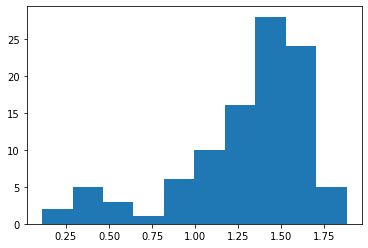

In [5]:
process(path)

In [10]:
process(path)

0.12


In [9]:

path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/test_reversed.hdf5"
theta, energy, probability = process(path)


In [5]:
plt.plot(theta, energy, ".")

NameError: name 'theta' is not defined

In [10]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, energy, probability)

In [11]:
%matplotlib qt

e_par = energy*np.cos(np.deg2rad(theta))
e_per = energy*np.sin(np.deg2rad(theta))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e_per, e_par, probability)
ax.set_xlabel("Perpenducilar")
ax.set_ylabel("Parrallel")

Text(0.5, 0, 'Parrallel')